In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
age = np.array([10, 12, 11, 13, 26, 28, 25, 29])
spend = np.array([2, 1, 3, 1, 6, 9, 7, 8])

In [3]:
dict = {"Age":age, "Spend_k":spend}

In [4]:
df = pd.DataFrame(dict)

In [5]:
df.head()

,Age,Spend_k
0,10,2
1,12,1
2,11,3
3,13,1
4,26,6


# Draw Scatter Plot:-

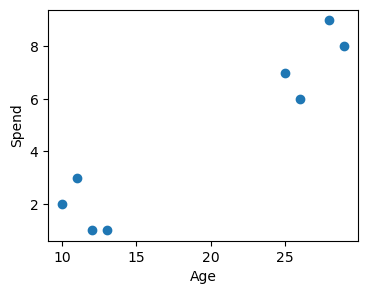

In [6]:
plt.figure(figsize=(4,3))
plt.scatter(df["Age"],df["Spend_k"])
plt.xlabel("Age")
plt.ylabel("Spend")
plt.show()

# Create 2 Random Centroids Points:-

1st Centroids Points

In [7]:
first_cent_1 = df.iloc[1]
first_cent_1

Age        12
Spend_k     1
Name: 1, dtype: int32

2nd Centroids Points

In [8]:
first_cent_2 = df.iloc[4]
first_cent_2

Age        26
Spend_k     6
Name: 4, dtype: int32

# Find Distance By Euclidain Distance:-

In [9]:
first_cent_1_ls = []
for i in range(8):
    pc1 = np.sqrt((first_cent_1[0]-df.iloc[i][0])**2 + (first_cent_1[1]-df.iloc[i][1])**2)
    first_cent_1_ls.append(pc1)
first_cent_1_ls

[2.23606797749979,
 0.0,
 2.23606797749979,
 1.0,
 14.866068747318506,
 17.88854381999832,
 14.317821063276353,
 18.384776310850235]

In [10]:
first_cent_2_ls = []
for i in range(8):
    pc1 = np.sqrt((first_cent_2[0]-df.iloc[i][0])**2 + (first_cent_2[1]-df.iloc[i][1])**2)
    first_cent_2_ls.append(pc1)
first_cent_2_ls

[16.492422502470642,
 14.866068747318506,
 15.297058540778355,
 13.92838827718412,
 0.0,
 3.605551275463989,
 1.4142135623730951,
 3.605551275463989]

# Create a New DataFrame:-

In [11]:
df1 = df.copy()

# Create 2 New Col and Add Centriod 1 & Centriod 2 in DataFrame:-

In [12]:
df1["first_Cent_1"] = first_cent_1_ls
df1["first_Cent_2"] = first_cent_2_ls

In [13]:
df1

,Age,Spend_k,first_Cent_1,first_Cent_2
0,10,2,2.236068,16.492423
1,12,1,0.000000,14.866069
2,11,3,2.236068,15.297059
3,13,1,1.000000,13.928388
4,26,6,14.866069,0.000000
5,28,9,17.888544,3.605551
6,25,7,14.317821,1.414214
7,29,8,18.384776,3.605551


# Create Cluster:-

In [14]:
clu = []
for i in range(len(df1)):
    a = df1.iloc[i,2:]
    clu.append(a.index[np.argmin(df1.iloc[i,2:])])

In [15]:
df1["1st Cluster"] = clu

In [16]:
df1

,Age,Spend_k,first_Cent_1,first_Cent_2,1st Cluster
0,10,2,2.236068,16.492423,first_Cent_1
1,12,1,0.000000,14.866069,first_Cent_1
2,11,3,2.236068,15.297059,first_Cent_1
3,13,1,1.000000,13.928388,first_Cent_1
4,26,6,14.866069,0.000000,first_Cent_2
5,28,9,17.888544,3.605551,first_Cent_2
6,25,7,14.317821,1.414214,first_Cent_2
7,29,8,18.384776,3.605551,first_Cent_2


# Draw 1st Centroid Point IN Scatter Plot:-

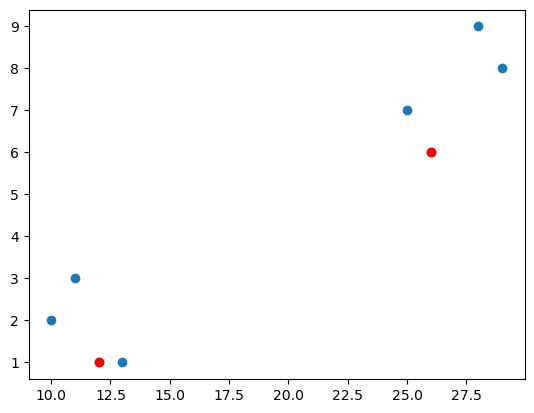

In [17]:
plt.scatter(df1["Age"], df1["Spend_k"])
plt.scatter(first_cent_1[0], first_cent_1[1], color="red")
plt.scatter(first_cent_2[0], first_cent_2[1], color="red")
plt.show()

# Again Find New 2nd Centroid Point:-

In [18]:
second_cent_1 = df1[["Age","Spend_k"]][df1["1st Cluster"]=="first_Cent_1"].mean()
second_cent_1

Age        11.50
Spend_k     1.75
dtype: float64

In [19]:
second_cent_2 = df1[["Age","Spend_k"]][df1["1st Cluster"]=="first_Cent_2"].mean()
second_cent_2

Age        27.0
Spend_k     7.5
dtype: float64

# Second Time Find Distance By Euclidain Distance:-

In [20]:
second_cent_1_ls = []
for i in range(8):
    pc1 = np.sqrt((second_cent_1[0]-df.iloc[i][0])**2 + (second_cent_1[1]-df.iloc[i][1])**2)
    second_cent_1_ls.append(pc1)
second_cent_1_ls

[1.5206906325745548,
 0.9013878188659973,
 1.346291201783626,
 1.6770509831248424,
 15.110013236261576,
 18.02255531271856,
 14.484905936870975,
 18.58258593414813]

In [21]:
second_cent_2_ls = []
for i in range(8):
    pc1 = np.sqrt((second_cent_2[0]-df.iloc[i][0])**2 + (second_cent_2[1]-df.iloc[i][1])**2)
    second_cent_2_ls.append(pc1)
second_cent_2_ls

[17.867568385205637,
 16.347782724271816,
 16.62077013859466,
 15.435349040433131,
 1.8027756377319946,
 1.8027756377319946,
 2.0615528128088303,
 2.0615528128088303]

# Create 2 New Col and Add Second Centriod 1 & Second Centriod 2 in DataFrame:-

In [22]:
df1["second_Cent_1"] = second_cent_1_ls
df1["second_Cent_2"] = second_cent_2_ls

In [23]:
df1

,Age,Spend_k,first_Cent_1,first_Cent_2,1st Cluster,second_Cent_1,second_Cent_2
0,10,2,2.236068,16.492423,first_Cent_1,1.520691,17.867568
1,12,1,0.000000,14.866069,first_Cent_1,0.901388,16.347783
2,11,3,2.236068,15.297059,first_Cent_1,1.346291,16.620770
3,13,1,1.000000,13.928388,first_Cent_1,1.677051,15.435349
4,26,6,14.866069,0.000000,first_Cent_2,15.110013,1.802776
5,28,9,17.888544,3.605551,first_Cent_2,18.022555,1.802776
6,25,7,14.317821,1.414214,first_Cent_2,14.484906,2.061553
7,29,8,18.384776,3.605551,first_Cent_2,18.582586,2.061553


# Second Create Cluster:-

In [24]:
clu2 = []
for i in range(len(df1)):
    a = df1.iloc[i,5:]
    clu2.append(a.index[np.argmin(df1.iloc[i,5:])])

In [25]:
df1["2nd Cluster"] = clu2

In [26]:
df1

,Age,Spend_k,first_Cent_1,first_Cent_2,1st Cluster,second_Cent_1,second_Cent_2,2nd Cluster
0,10,2,2.236068,16.492423,first_Cent_1,1.520691,17.867568,second_Cent_1
1,12,1,0.000000,14.866069,first_Cent_1,0.901388,16.347783,second_Cent_1
2,11,3,2.236068,15.297059,first_Cent_1,1.346291,16.620770,second_Cent_1
3,13,1,1.000000,13.928388,first_Cent_1,1.677051,15.435349,second_Cent_1
4,26,6,14.866069,0.000000,first_Cent_2,15.110013,1.802776,second_Cent_2
5,28,9,17.888544,3.605551,first_Cent_2,18.022555,1.802776,second_Cent_2
6,25,7,14.317821,1.414214,first_Cent_2,14.484906,2.061553,second_Cent_2
7,29,8,18.384776,3.605551,first_Cent_2,18.582586,2.061553,second_Cent_2


# Draw 2nd Centroid Point IN Scatter Plot:-

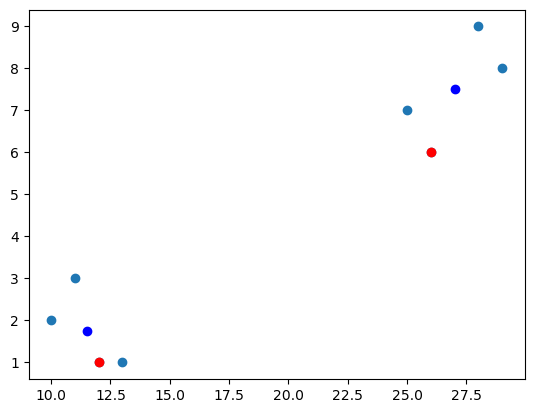

In [27]:
plt.scatter(df1["Age"], df1["Spend_k"])
plt.scatter(first_cent_1[0], first_cent_1[1], color="red")
plt.scatter(first_cent_2[0], first_cent_2[1], color="red")

plt.scatter(second_cent_1[0], second_cent_1[1], color="blue")
plt.scatter(second_cent_2[0], second_cent_2[1], color="blue")
plt.show()

# Again Find New 3rd Centroid Point:-

In [28]:
third_cent_1 = df1[["Age","Spend_k"]][df1["2nd Cluster"]=="second_Cent_1"].mean()
third_cent_1

Age        11.50
Spend_k     1.75
dtype: float64

In [29]:
third_cent_2 = df1[["Age","Spend_k"]][df1["2nd Cluster"]=="second_Cent_2"].mean()
third_cent_2

Age        27.0
Spend_k     7.5
dtype: float64

# Third Time Find Distance By Euclidain Distance:-

In [30]:
third_cent_1_ls = []
for i in range(8):
    pc1 = np.sqrt((third_cent_1[0]-df.iloc[i][0])**2 + (third_cent_1[1]-df.iloc[i][1])**2)
    third_cent_1_ls.append(pc1)
third_cent_1_ls

[1.5206906325745548,
 0.9013878188659973,
 1.346291201783626,
 1.6770509831248424,
 15.110013236261576,
 18.02255531271856,
 14.484905936870975,
 18.58258593414813]

In [31]:
third_cent_2_ls = []
for i in range(8):
    pc1 = np.sqrt((third_cent_2[0]-df.iloc[i][0])**2 + (third_cent_2[1]-df.iloc[i][1])**2)
    third_cent_2_ls.append(pc1)
third_cent_2_ls

[17.867568385205637,
 16.347782724271816,
 16.62077013859466,
 15.435349040433131,
 1.8027756377319946,
 1.8027756377319946,
 2.0615528128088303,
 2.0615528128088303]

# Create 2 New Col and Add Third Centriod 1 & Third Centriod 2 in DataFrame:-

In [32]:
df1["third_Cent_1"] = third_cent_1_ls
df1["third_Cent_2"] = third_cent_2_ls

In [33]:
df1

,Age,Spend_k,first_Cent_1,first_Cent_2,1st Cluster,second_Cent_1,second_Cent_2,2nd Cluster,third_Cent_1,third_Cent_2
0,10,2,2.236068,16.492423,first_Cent_1,1.520691,17.867568,second_Cent_1,1.520691,17.867568
1,12,1,0.000000,14.866069,first_Cent_1,0.901388,16.347783,second_Cent_1,0.901388,16.347783
2,11,3,2.236068,15.297059,first_Cent_1,1.346291,16.620770,second_Cent_1,1.346291,16.620770
3,13,1,1.000000,13.928388,first_Cent_1,1.677051,15.435349,second_Cent_1,1.677051,15.435349
4,26,6,14.866069,0.000000,first_Cent_2,15.110013,1.802776,second_Cent_2,15.110013,1.802776
5,28,9,17.888544,3.605551,first_Cent_2,18.022555,1.802776,second_Cent_2,18.022555,1.802776
6,25,7,14.317821,1.414214,first_Cent_2,14.484906,2.061553,second_Cent_2,14.484906,2.061553
7,29,8,18.384776,3.605551,first_Cent_2,18.582586,2.061553,second_Cent_2,18.582586,2.061553


# Third Create Cluster:-

In [34]:
clu3 = []
for i in range(len(df1)):
    a = df1.iloc[i,8:]
    clu3.append(a.index[np.argmin(df1.iloc[i,8:])])

In [35]:
df1["3rd Cluster"] = clu3

In [36]:
df1

,Age,Spend_k,first_Cent_1,first_Cent_2,1st Cluster,second_Cent_1,second_Cent_2,2nd Cluster,third_Cent_1,third_Cent_2,3rd Cluster
0,10,2,2.236068,16.492423,first_Cent_1,1.520691,17.867568,second_Cent_1,1.520691,17.867568,third_Cent_1
1,12,1,0.000000,14.866069,first_Cent_1,0.901388,16.347783,second_Cent_1,0.901388,16.347783,third_Cent_1
2,11,3,2.236068,15.297059,first_Cent_1,1.346291,16.620770,second_Cent_1,1.346291,16.620770,third_Cent_1
3,13,1,1.000000,13.928388,first_Cent_1,1.677051,15.435349,second_Cent_1,1.677051,15.435349,third_Cent_1
4,26,6,14.866069,0.000000,first_Cent_2,15.110013,1.802776,second_Cent_2,15.110013,1.802776,third_Cent_2
5,28,9,17.888544,3.605551,first_Cent_2,18.022555,1.802776,second_Cent_2,18.022555,1.802776,third_Cent_2
6,25,7,14.317821,1.414214,first_Cent_2,14.484906,2.061553,second_Cent_2,14.484906,2.061553,third_Cent_2
7,29,8,18.384776,3.605551,first_Cent_2,18.582586,2.061553,second_Cent_2,18.582586,2.061553,third_Cent_2


# Draw 3rd Centroid Point IN Scatter Plot:-

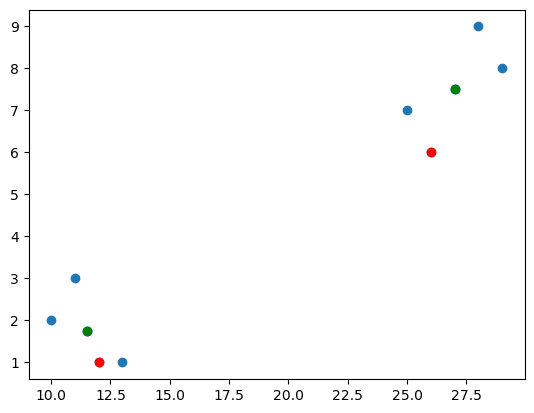

In [37]:
plt.scatter(df1["Age"], df1["Spend_k"])
plt.scatter(first_cent_1[0], first_cent_1[1], color="red")
plt.scatter(first_cent_2[0], first_cent_2[1], color="red")

plt.scatter(second_cent_1[0], second_cent_1[1], color="blue")
plt.scatter(second_cent_2[0], second_cent_2[1], color="blue")

plt.scatter(third_cent_1[0], third_cent_1[1], color="green")
plt.scatter(third_cent_2[0], third_cent_2[1], color="green")
plt.show()